LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , Ridge , RidgeCV ,Lasso , LassoCV , LogisticRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import make_scorer

IMPORT DATASET

In [2]:
dataset = datasets.load_diabetes()
X = dataset.data
Y = dataset.target

DATA FRAME 

In [3]:
df = pd.DataFrame(dataset.data , columns= dataset.feature_names)

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


LINEAR REGRESSION

In [5]:
x_train , x_test , y_train , y_test =train_test_split(X , Y , test_size = 0.90, random_state = 0)

reg1= LinearRegression(fit_intercept=True)
reg1.fit(x_train , y_train)

print("Line Regression Train Score : " ,reg1.score(x_train , y_train )*100)
Y_predict = reg1.predict(x_test)

print(x_train.shape, y_train.shape , x_test.shape , y_test.shape)
# print("Regression coefficient:" , reg.coef_)

Line Regression Train Score :  64.29497505645962
(44, 10) (44,) (398, 10) (398,)


Line Regression Train Score :  42.89023937312362
Line Regression Train Score :  42.4465052285843
Line Regression Train Score :  43.419519588327105
Line Regression Train Score :  44.00856032490786
Line Regression Train Score :  44.18915587534998
Line Regression Train Score :  44.78173806578889
Line Regression Train Score :  47.51360246561514
Line Regression Train Score :  47.00304242888945
Line Regression Train Score :  46.7681746059565
Line Regression Train Score :  46.3581783108087


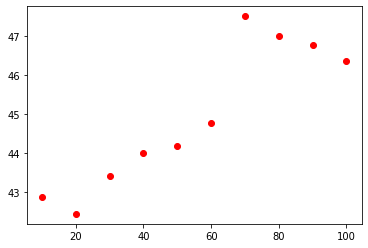

In [6]:
************SCORE PER ITERATION OF THE TEST SIZE =10************

x = []
y = []
i =1 
for i in range(1 ,11):
    x.append(i*10)
    x_train , x_test , y_train , y_test =train_test_split(X , Y , test_size = i*10, random_state = 0)
    print("Line Regression Train Score : " ,reg1.score(x_train , y_train )*100)
    y.append(reg1.score(x_train , y_train )*100)
    
x_ = np.array(x)
y_ = np.array(y)
plt.plot(x , y , 'ro')

In [7]:
reg2 = LinearRegression(fit_intercept=True)
reg2.fit(x_test , y_test)

print("Line Regression Test Score : " ,reg2.score(x_test , y_test )*100)

Line Regression Test Score :  42.59969756909936


Line Regression Train Score :  11.374791939847784
Line Regression Train Score :  41.22112827420275
Line Regression Train Score :  26.22166410976319
Line Regression Train Score :  21.324199882100448
Line Regression Train Score :  23.1183156474531
Line Regression Train Score :  20.218443564365252
Line Regression Train Score :  9.215849678446043
Line Regression Train Score :  16.337598937607556
Line Regression Train Score :  22.003975081308347
Line Regression Train Score :  25.784298991794753


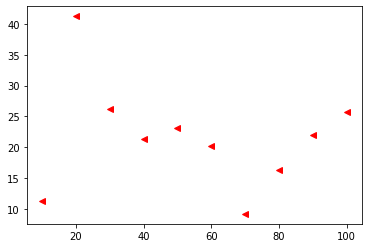

In [8]:
x = []
y = []
i =1 
for i in range(1 ,11):
    x.append(i*10)
    x_train , x_test , y_train , y_test =train_test_split(X , Y , test_size = i*10, random_state = 0)
    print("Line Regression Train Score : " ,reg1.score(x_test , y_test )*100)
    y.append(reg1.score(x_test , y_test )*100)
    
x_ = np.array(x)
y_ = np.array(y)
plt.plot(x , y , 'r<')

RIDGE REGRESSION

In [9]:
Rid1 = Ridge(alpha = 0.05, max_iter= 100000 , tol =0.000001 )
Rid1.fit(x_train , y_train)
print("Ridge Train Score:" , Rid1.score(x_train , y_train)*100)
print("Ridge CV Train score :",cross_val_score(Rid1 , x_train , y_train ,cv=5).mean()*100)


Ridge Train Score: 54.9988494225342
Ridge CV Train score : 52.07829604102612


In [10]:
Rid2 =Ridge(alpha = 0.000005, max_iter=10000000 , tol=0.0000001)
Rid2.fit(x_test , y_test)
print("Ridge Test Score : " , Rid2.score(x_test , y_test)*100 )
print("Ridge CV Test score :",cross_val_score(Rid2 ,x_test , y_test ,cv=5).mean()*100)

Ridge Test Score :  42.5995297223778
Ridge CV Test score : 27.439425685598767


In [11]:
r1 = RidgeCV(alphas=(0.1, 1.0, 0.001, 0.0001, 0.05, 0.5, 0.005))
r1.fit(x_test , y_test)
r1.alpha_

0.1

LASSO REGRESSION 

In [12]:
las1 = Lasso(alpha = 0.1 , max_iter = 1000 , tol = 0.001)
las1.fit(x_train , y_train)
print("Lasso Train Score:" , las1.score(x_train , y_train)*100)
print("Lasso CV Train score :",cross_val_score(las1 , x_train , y_train ,cv=5).mean()*100)


Lasso Train Score: 54.54251299297339
Lasso CV Train score : 52.14846972540557


In [13]:
las2 = Lasso(alpha = 0.000001 , max_iter = 100000 , tol = 0.00001)
las2.fit(x_test , y_test)
print("Lasso Test Score:" , las2.score(x_test , y_test)*100)
print("Lasso CV Test score :",cross_val_score(las2 , x_train , y_train ,cv=5).mean()*100)

Lasso Test Score: 42.599697556844
Lasso CV Test score : 51.938661514027395


LOGISTIC REGRESSION 

In [14]:
log1 = LogisticRegression(C= 2.0 , solver="sag", multi_class="multinomial" , max_iter =10000 , tol = 0.0001)
log1.fit(x_train , y_train )
print("Logistic Regression Train Score:" ,log1.score(x_train, y_train)*100)

Logistic Regression Train Score: 4.093567251461988


In [20]:
log2 = LogisticRegression(C= 1.0 , solver="sag", multi_class="multinomial" , max_iter =100 , tol = 0.01)
log2.fit(x_train , y_train )
print("Logistic Regression Test Score:" ,log2.score(x_test, y_test)*100)

Logistic Regression Test Score: 1.0


IN LOGISTIC REGRESSION ,THIS DATASET IS NOT A CLASSIFIED DATASET WHICH FITS INTO THIS ALGO .

THEREFORE , THE SCORE IN TEST AND TRAIN SET IS NOT A VALID ONE.
(USE A CLASSIFICAION DATASET FOR LOGISTIC REG.)

POLYNOMIAL REGRESSION

In [23]:
poly = PolynomialFeatures(3)
poly.fit_transform(x_train , y_train )
# print("Polynomial Regression Train Score:", poly.score(x_train , y_train )*100)


array([[ 1.00000000e+00,  9.01559883e-03, -4.46416365e-02, ...,
        -2.85201347e-06,  6.36879297e-07, -1.42220660e-07],
       [ 1.00000000e+00, -9.26954778e-02, -4.46416365e-02, ...,
        -1.63386137e-04, -3.82260297e-04, -8.94341087e-04],
       [ 1.00000000e+00,  5.26060602e-02,  5.06801187e-02, ...,
        -2.51333566e-04,  3.71620171e-05, -5.49475162e-06],
       ...,
       [ 1.00000000e+00,  5.98711371e-02, -4.46416365e-02, ...,
         8.48949794e-04,  1.45508168e-03,  2.49397868e-03],
       [ 1.00000000e+00, -7.81653240e-02, -4.46416365e-02, ...,
        -2.75484996e-05, -1.27598601e-04, -5.91008703e-04],
       [ 1.00000000e+00,  4.17084449e-02,  5.06801187e-02, ...,
         4.62953784e-04,  5.41761600e-04,  6.33984733e-04]])

In [ ]:
THIS ABOVE ARE THE VALUE OF COEFFICIENTS IN THE POLYNOMIAL EQUATION

In [17]:
poly

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')